In [1]:
import numpy as np
import matplotlib.pyplot as plt

# --- IRF parameters (Jeltsch-Thömmes & Joos, 2019)
a0 = 0.008
a  = np.array([0.044, 0.112, 0.224, 0.310, 0.297], dtype=float)
tau = np.array([68521.0, 5312.0, 362.0, 47.0, 6.0], dtype=float)


In [2]:
def IRF(t):
    """
    IRF(t) = a0 + sum_i a_i exp(-t/tau_i)
    Works for scalar or vector t.
    """
    t = np.asarray(t, dtype=float)
    if t.ndim == 0:
        return a0 + np.sum(a*np.exp(-t/tau))
    return a0 + np.sum(a*np.exp(-t[:, None]/tau), axis=1)

def trapz(yvals, xvals):
    """Robust trapezoidal integration (works across numpy versions)."""
    yvals = np.asarray(yvals, dtype=float)
    xvals = np.asarray(xvals, dtype=float)
    return np.sum((yvals[1:] + yvals[:-1]) * 0.5 * (xvals[1:] - xvals[:-1]))

def IRF_int_numeric(H, n=20_000):
    """Numeric integral: ∫_0^H IRF(t) dt"""
    t = np.linspace(0.0, float(H), n+1)
    return trapz(IRF(t), t)

def IRF_int_analytic(H):
    """Analytic integral: ∫_0^H IRF(t) dt"""
    H = float(H)
    return a0*H + np.sum(a*tau*(1.0 - np.exp(-H/tau)))


IRF_int_analytic(20) = 14.402219639137 yr - this is the value to use for TCE(H)
IRF_int_numeric (20) = 14.402219643308 yr  this is a sanity check using 20000 trapezoids.
abs diff = 4.171e-09 yr


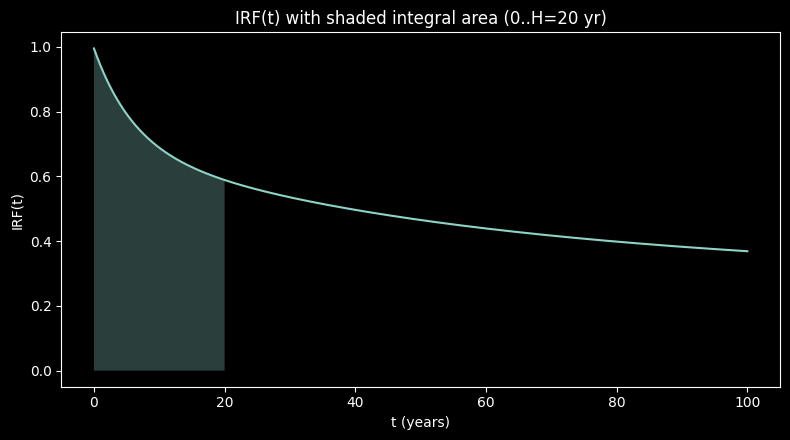

In [3]:
# --- User choices (edit here)
H = 20
n = 20_000

val_a = IRF_int_analytic(H)
val_n = IRF_int_numeric(H, n=n)

print(f"IRF_int_analytic({H:.0f}) = {val_a:.12f} yr - this is the value to use for TCE(H)")
print(f"IRF_int_numeric ({H:.0f}) = {val_n:.12f} yr  this is a sanity check using {n} trapezoids.")
print(f"abs diff = {abs(val_n - val_a):.3e} yr")

# --- Plot choices
tmax = 100
dt = 0.1

t = np.arange(0.0, tmax + dt, dt)
yvals = IRF(t)

mask = (t <= H)

plt.figure(figsize=(8, 4.5))
plt.plot(t, yvals)
plt.fill_between(t[mask], 0, yvals[mask], alpha=0.3)
plt.xlabel("t (years)")
plt.ylabel("IRF(t)")
plt.title(f"IRF(t) with shaded integral area (0..H={H} yr)")
plt.tight_layout()
plt.show()
